# Capstone Project Module 2  
## Analisis Performa Penjualan dan Profitabilitas SaaS berdasarkan Region dan Industry


In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [189]:
base_dir = "/Users/muhammadiqbal/Library/Mobile Documents/com~apple~CloudDocs/DATA SET/Capstone 2/"
path = base_dir + "SaaS-Sales.csv"

In [190]:
# Visualisasi 
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

In [191]:
df = pd.read_csv("SaaS-Sales.csv")

df.head()
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [192]:
# Cleaning data
# Hapus duplikasi
df = df.drop_duplicates()

# Konversi tipe data
df['Order Date'] = pd.to_datetime(df['Order Date'])
df[['Sales','Profit','Discount']] = df[['Sales','Profit','Discount']].astype(float)

# Pengecekan missing value
df.isna().sum()


Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [193]:
# Profit Margin
df['profit_margin'] = df['Profit'] / df['Sales']

# Time features
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year


In [194]:
kpi = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Profit', 'Avg Profit Margin'],
    'Value': [total_sales, total_profit, avg_profit_margin]
})

kpi

,Metric,Value
0,Total Sales,2.297201e+06
1,Total Profit,2.863970e+05
2,Avg Profit Margin,1.246722e-01


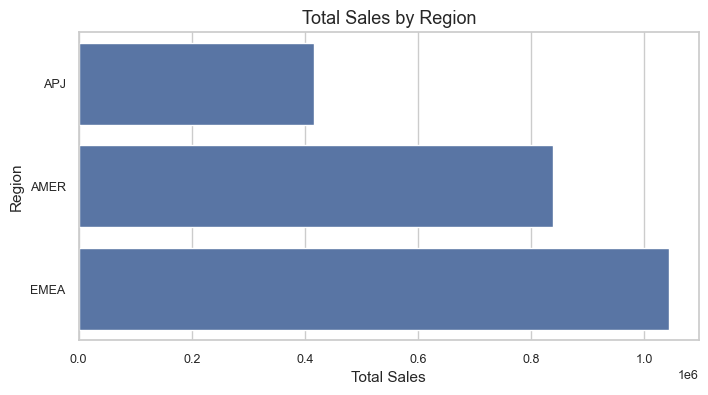

In [195]:
# Total Sales by Region
sales_region = df.groupby('Region')['Sales'].sum().sort_values()

sns.barplot(x=sales_region.values, y=sales_region.index)
plt.title("Total Sales by Region")
plt.xlabel("Total Sales")
plt.ylabel("Region")
plt.show()



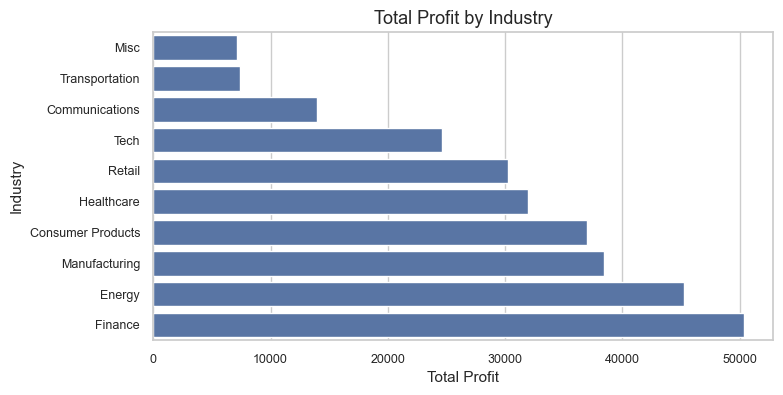

In [196]:
# Total Profit by Industry
profit_industry = df.groupby('Industry')['Profit'].sum().sort_values()

sns.barplot(x=profit_industry.values, y=profit_industry.index)
plt.title("Total Profit by Industry")
plt.xlabel("Total Profit")
plt.ylabel("Industry")
plt.show()



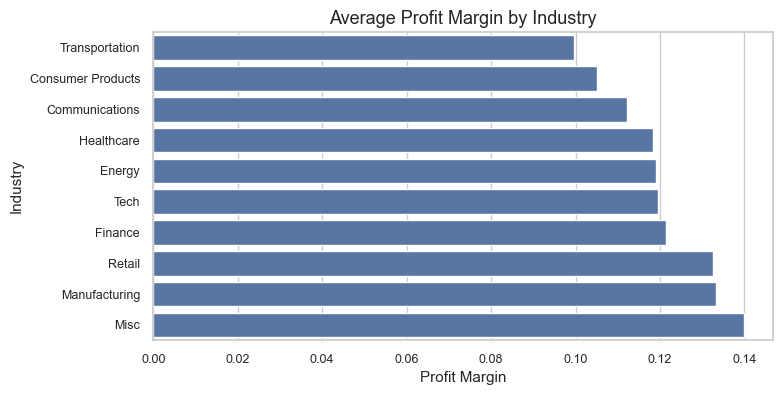

In [197]:
# Average Profit Margin by Industry
margin_industry = df.groupby('Industry')['profit_margin'].mean().sort_values()

sns.barplot(x=margin_industry.values, y=margin_industry.index)
plt.title("Average Profit Margin by Industry")
plt.xlabel("Profit Margin")
plt.ylabel("Industry")
plt.show()



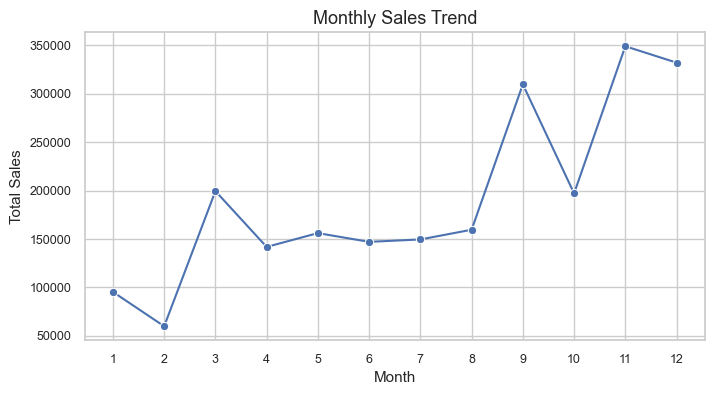

In [198]:
# Monthly Sales Trend
monthly_sales = df.groupby('order_month')['Sales'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='order_month', y='Sales', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.show()



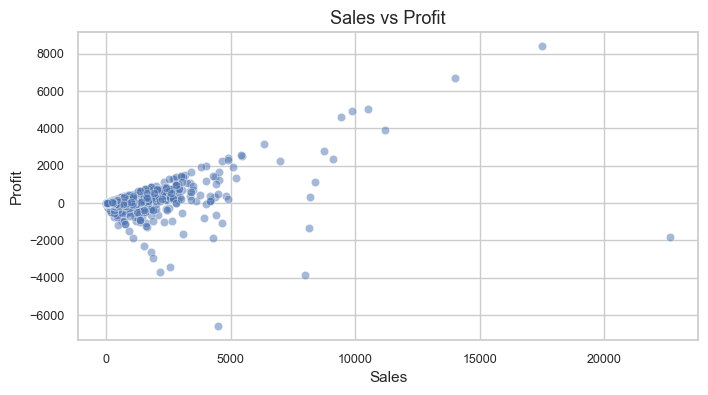

In [199]:
#Sales vs Profit
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.5)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


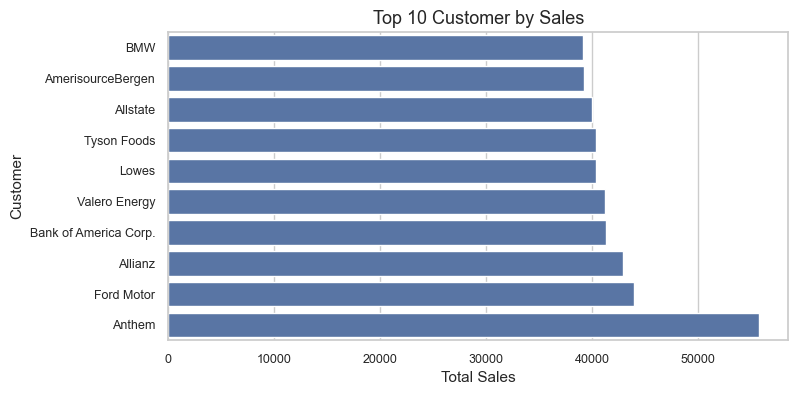

In [200]:
# Top 10 Customer by Sales
top_customer = (
    df.groupby('Customer')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .sort_values()
)

sns.barplot(x=top_customer.values, y=top_customer.index)
plt.title("Top 10 Customer by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer")
plt.show()



In [201]:
#CUSTOMER SEGMENTATION – LRFM
snapshot_date = df['Order Date'].max()



In [202]:
# Perhitungan LRFM
lrfm = df.groupby('Customer').agg({
    'Order Date': [
        lambda x: (snapshot_date - x.min()).days,
        lambda x: (snapshot_date - x.max()).days,
        'count'
    ],
    'Sales': 'sum'
})

lrfm.columns = ['Length','Recency','Frequency','Monetary']


In [203]:
# Scoring LRFM (Quantile)
lrfm['L_score'] = pd.qcut(lrfm['Length'], 4, labels=[4,3,2,1])
lrfm['R_score'] = pd.qcut(lrfm['Recency'], 4, labels=[4,3,2,1])
lrfm['F_score'] = pd.qcut(lrfm['Frequency'], 4, labels=[1,2,3,4])
lrfm['M_score'] = pd.qcut(lrfm['Monetary'], 4, labels=[1,2,3,4])

# Total Score & Segment
lrfm['LRFM_Score'] = (
    lrfm['L_score'].astype(int) +
    lrfm['R_score'].astype(int) +
    lrfm['F_score'].astype(int) +
    lrfm['M_score'].astype(int)
)

def segment(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'Loyal Customers'
    elif score >= 7:
        return 'Potential'
    else:
        return 'At Risk'

lrfm['Segment'] = lrfm['LRFM_Score'].apply(segment)
lrfm['Segment'].value_counts()




Segment
Loyal Customers    36
Potential          35
Champions          20
At Risk             8
Name: count, dtype: int64

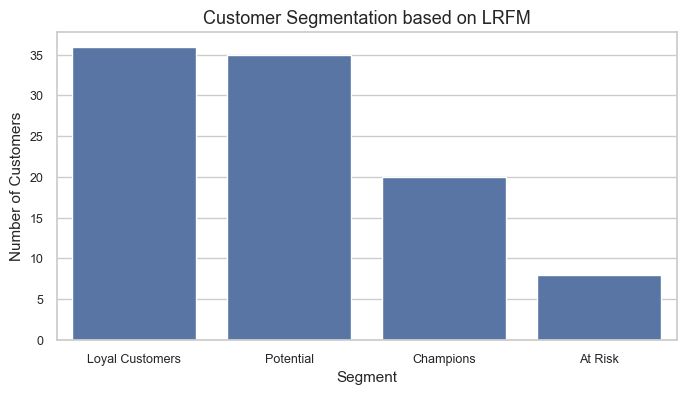

In [204]:
sns.countplot(
    data=lrfm,
    x='Segment',
    order=lrfm['Segment'].value_counts().index
)
plt.title("Customer Segmentation based on LRFM")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()



In [205]:
# Proyeksi Profit di refion terendah
# Identifikasi region terendah
profit_region = df.groupby('Region')['Profit'].sum().sort_values()
target_region = profit_region.idxmin()
target_region



'APJ'

In [206]:
# Kondisi saat ini
region_df = df[df['Region'] == target_region]

current_sales = region_df['Sales'].sum()
current_profit = region_df['Profit'].sum()
current_margin = current_profit / current_sales




In [207]:
# Proyeksi margin naik 2 %
projected_profit = current_sales * (current_margin + 0.02)

projection_summary = pd.DataFrame({
    'Metric': ['Current Profit', 'Projected Profit'],
    'Value': [current_profit, projected_profit]
})

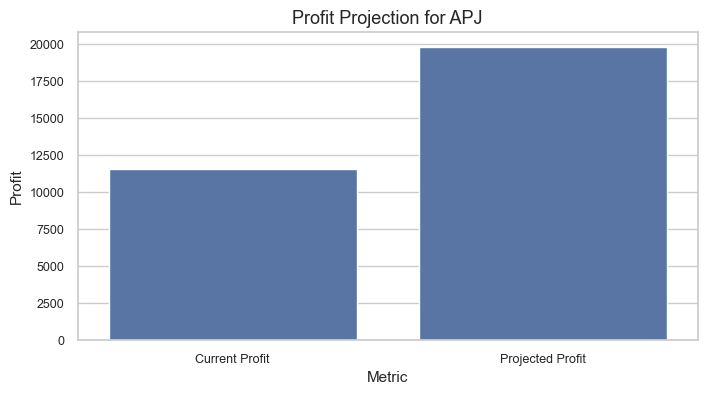

In [208]:
sns.barplot(data=projection_summary, x='Metric', y='Value')
plt.title(f"Profit Projection for {target_region}")
plt.ylabel("Profit")
plt.show()



In [209]:
# Top 3 Industri Potensial di Region Tersebut
industry_potential = (
    region_df.groupby('Industry')
    .agg(
        total_sales=('Sales','sum'),
        total_profit=('Profit','sum'),
        avg_margin=('profit_margin','mean')
    )
    .sort_values(by='avg_margin', ascending=False)
)

top_3 = industry_potential.head(3).reset_index()



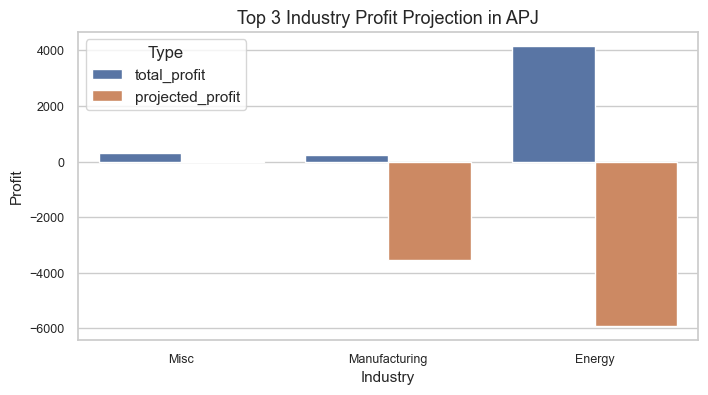

In [210]:
top_3['projected_profit'] = top_3['total_sales'] * (top_3['avg_margin'] + 0.03)

plot_df = top_3.melt(
    id_vars='Industry',
    value_vars=['total_profit','projected_profit'],
    var_name='Type',
    value_name='Profit'
)

sns.barplot(data=plot_df, x='Industry', y='Profit', hue='Type')
plt.title(f"Top 3 Industry Profit Projection in {target_region}")
plt.show()


Berdasarkan analisis tren penjualan bulanan, strategi peningkatan profit dan
optimalisasi customer sebaiknya diterapkan pada periode Februari–Maret,
sehingga dampaknya dapat dimaksimalkan pada periode penjualan tertinggi
di kuartal berikutnya.

In [211]:
tableau_df = df[[
    'Order Date',
    'Region',
    'Industry',
    'Customer',
    'Sales',
    'Profit',
    'Discount',
    'profit_margin'
]]

tableau_df.to_csv(
    "saas_sales_ready_for_tableau.csv",
    index=False,
    encoding='utf-8'
)
